In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pickle

from google.colab import drive
drive.mount('/content/drive')

import os


model_dir = '/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/'

print(os.listdir(model_dir))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['ABBVscalermodel', 'HPT.gsheet', 'best_model_ABBV.h5', 'ABBVGRU_MODEL', 'best_model_ABBV_GRU.h5', 'NVDAGRU_MODEL', 'MSFTGRU_MODEL', 'best_model_MSFT_GRU.h5', 'NVDAscalermodel', 'AMDscalermodel', 'NVDA_scaler.pkl', 'NVDA_columns.txt', 'MSFTscalermodel', 'Models', '.ipynb_checkpoints', 'best_model_NVDA.h5', 'best_model_NVDA_GRU.h5', 'AMD_scaler.pkl', 'AMD_columns.txt', 'best_model_AMD.h5', 'best_model_MSFT.h5']


In [10]:
LSTM_MODEL_PATH = "/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/Models/"
COMPANY = "NVDA"
train_data= pd.read_csv('/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/train_NVDA.csv')
test_data=pd.read_csv('/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/test_NVDA.csv')
# Load the saved model
model_path = os.path.join(LSTM_MODEL_PATH, f"best_model_{COMPANY}.h5")
model = tf.keras.models.load_model(model_path)
print("Model loaded.")

import numpy as np
def prepare_seq(data, seq_len):   #eg seq=len = 50
  sequences, labels = [], []

  #len of data is 1353 then 1353 - 50 is the range
  for i in range(len(data) - seq_len):
    #e0 to 50
    x_temp = data.iloc[i:i+seq_len].values
    #stores 50th value
    y_temp = data.iloc[i+seq_len].values

    sequences.append(x_temp)
    labels.append(y_temp)
  return np.array (sequences), np.array(labels)

# define the sequence length
SEQ_LENGTH = 50
# process the dataset
train_sequences, train_labels = prepare_seq(train_data, SEQ_LENGTH)
test_sequences, test_labels = prepare_seq(test_data, SEQ_LENGTH)
print(train_sequences.shape, test_sequences.shape)

Model loaded.
(957, 50, 4) (202, 50, 4)


In [11]:
# Make predictions
df_path = '/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/df_NVDA.csv'
df = pd.read_csv(df_path)

In [12]:
df

,open,high,low,close
0,0.001284,0.000759,0.001076,0.001040
1,0.001712,0.001456,0.001334,0.001636
2,0.001391,0.001160,0.001463,0.001295
3,0.001583,0.001582,0.001248,0.001040
4,0.000556,0.001899,0.000043,0.002573
...,...,...,...,...
1254,0.968977,0.989999,0.972505,0.972947
1255,0.962473,0.952317,0.942860,0.943210
1256,0.919683,0.932315,0.830257,0.858770
1257,0.822978,0.900540,0.825954,0.909383


In [24]:
# Make predictions
df_path = '/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/df_NVDA.csv'
df = pd.read_csv(df_path)

# Update COLUMNS based on the actual column names in the CSV file
COLUMNS = df.columns.tolist()

#need to fix NOT WORKING
predictions = model.predict(test_sequences)

#scaler_path = os.path.join(LSTM_MODEL_PATH, f"{COMPANY}_scaler.pkl")
#with open(scaler_path, 'rb') as file:
with open("/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/NVDA_scaler.pkl", 'rb') as file:
    scaler = pickle.load(file)

inverse_predictions = scaler.inverse_transform(predictions)


PRED_COLUMNS = ['open_predicted', 'high_predicted', 'low_predicted', 'close_predicted']
pred_df = pd.DataFrame(inverse_predictions, columns=PRED_COLUMNS)


def evaluations(actual_df, pred_df):
    # Align the DataFrames by index or ensure they are of the same length
    common_length = min(len(actual_df), len(pred_df))
    actual_df = actual_df.iloc[:common_length]
    pred_df = pred_df.iloc[:common_length]

    cols = actual_df.columns.tolist()  # Assuming actual values are in a DataFrame `actual_df`
    for i, column in enumerate(cols):
        pred_col = PRED_COLUMNS[i]
        mse = mean_squared_error(actual_df[column].values, pred_df[pred_col].values)
        print(f"MSE for {column}: {mse}")
        print(f"RMSE for {column}: {np.sqrt(mse)}")

        plt.figure(figsize=(10, 6))
        plt.plot(actual_df.index, actual_df[column], label="Actual")
        plt.plot(pred_df.index, pred_df[pred_col], label="Predicted")
        plt.xlabel("Time")
        plt.ylabel(f"Price")
        plt.title(f"Comparison: Actual vs Predicted {column}")
        plt.legend()
        plt.grid(True)
        plt.show()



7/7 [==============================] - 0s 14ms/step


In [28]:
inverse_predictions

array([[102.79007 , 105.1528  , 101.874626, 103.90072 ],
       [103.21747 , 105.597984, 102.26142 , 104.33223 ],
       [104.3155  , 106.712074, 103.29434 , 105.40239 ],
       [105.411674, 107.835785, 104.29844 , 106.44844 ],
       [105.79747 , 108.22033 , 104.60537 , 106.79011 ],
       [106.07199 , 108.46439 , 104.82657 , 107.02274 ],
       [105.82441 , 108.16675 , 104.53963 , 106.73361 ],
       [106.45886 , 108.76518 , 105.12941 , 107.31065 ],
       [105.34234 , 107.595955, 103.99425 , 106.15755 ],
       [104.79551 , 106.96953 , 103.47548 , 105.59322 ],
       [104.93235 , 107.07426 , 103.60673 , 105.69246 ],
       [104.653824, 106.78351 , 103.3254  , 105.390495],
       [104.3585  , 106.46859 , 103.04704 , 105.08613 ],
       [104.367836, 106.4717  , 103.07402 , 105.093025],
       [115.03709 , 117.44587 , 113.42487 , 115.542984],
       [122.00373 , 124.920906, 119.78266 , 122.2497  ],
       [124.682014, 127.79548 , 122.06072 , 124.78283 ],
       [127.86688 , 130.99162 ,

In [25]:
df_pred

,open,high,low,close
0,0.001284,0.000759,0.001076,0.001040
1,0.001712,0.001456,0.001334,0.001636
2,0.001391,0.001160,0.001463,0.001295
3,0.001583,0.001582,0.001248,0.001040
4,0.000556,0.001899,0.000043,0.002573
...,...,...,...,...
1254,0.968977,0.989999,0.972505,0.972947
1255,0.962473,0.952317,0.942860,0.943210
1256,0.919683,0.932315,0.830257,0.858770
1257,0.822978,0.900540,0.825954,0.909383


In [31]:
pred_df

,open_predicted,high_predicted,low_predicted,close_predicted
0,102.790070,105.152802,101.874626,103.900719
1,103.217468,105.597984,102.261421,104.332230
2,104.315498,106.712074,103.294342,105.402390
3,105.411674,107.835785,104.298439,106.448441
4,105.797470,108.220329,104.605370,106.790108
...,...,...,...,...
197,189.246750,191.745224,173.724640,180.349228
198,184.852798,187.232086,169.440781,175.817734
199,181.524002,183.306870,166.582138,172.483505
200,171.676239,172.528397,157.625671,162.637253


MSE for open: 24098.45512019006
RMSE for open: 155.23677116002528


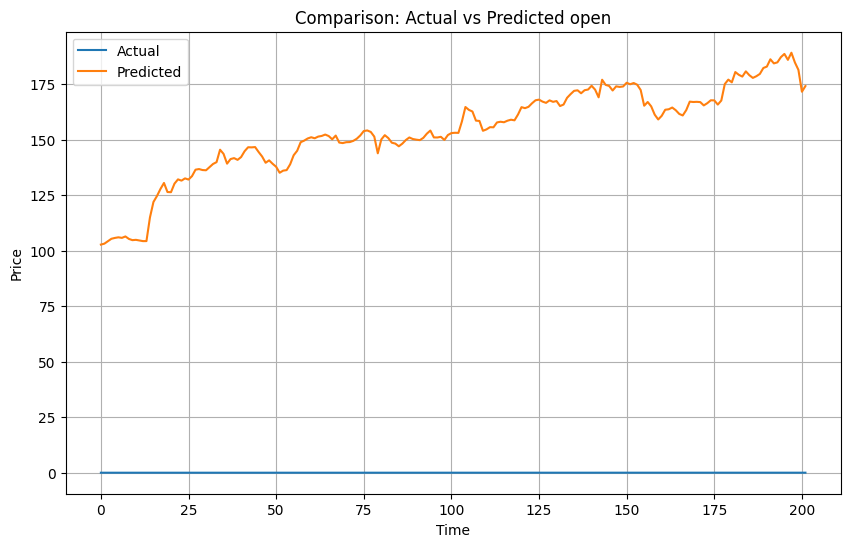

MSE for high: 24701.082294029482
RMSE for high: 157.16577965329947


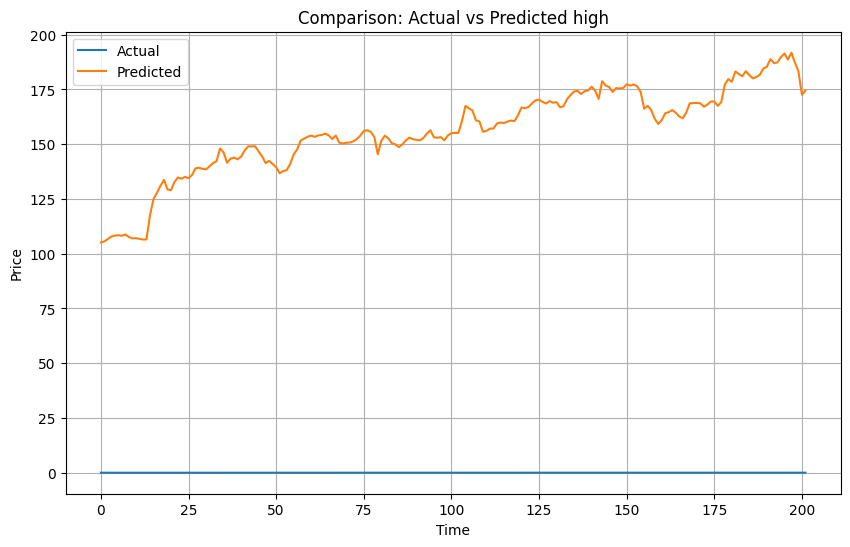

MSE for low: 21538.462492565162
RMSE for low: 146.7598803916287


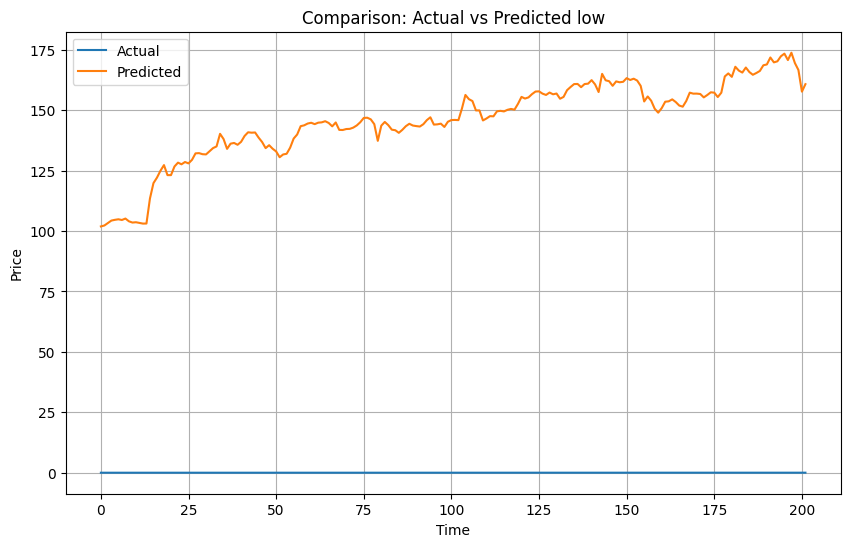

MSE for close: 22738.00992350356
RMSE for close: 150.79127933505822


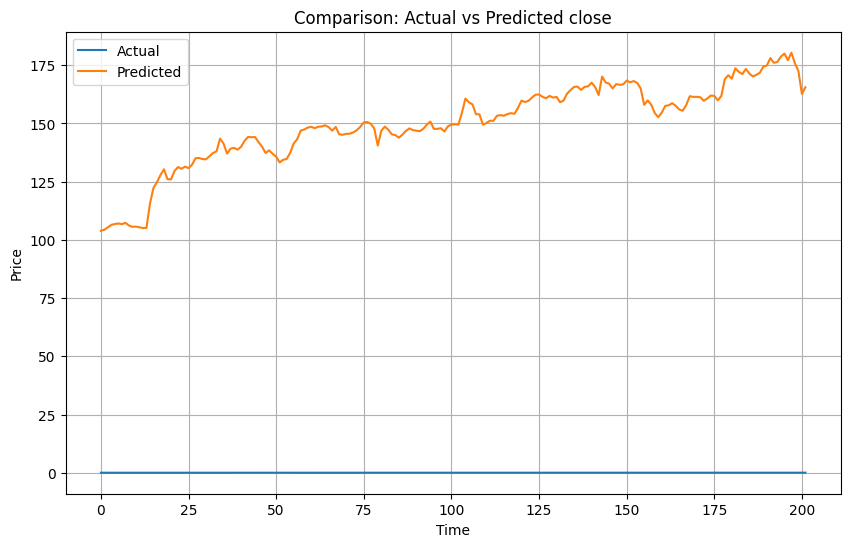

In [21]:
# Call the evaluation function
evaluations(df, pred_df)



In [8]:
print(COLUMNS)
print(pred_df.head())
print(inverse_predictions)

['open', 'high', 'low', 'close']
   open_predicted  high_predicted  low_predicted  close_predicted
0      102.790070      105.152802     101.874626       103.900719
1      103.217468      105.597984     102.261421       104.332230
2      104.315498      106.712074     103.294342       105.402390
3      105.411674      107.835785     104.298439       106.448441
4      105.797470      108.220329     104.605370       106.790108
[[102.79007  105.1528   101.874626 103.90072 ]
 [103.21747  105.597984 102.26142  104.33223 ]
 [104.3155   106.712074 103.29434  105.40239 ]
 [105.411674 107.835785 104.29844  106.44844 ]
 [105.79747  108.22033  104.60537  106.79011 ]
 [106.07199  108.46439  104.82657  107.02274 ]
 [105.82441  108.16675  104.53963  106.73361 ]
 [106.45886  108.76518  105.12941  107.31065 ]
 [105.34234  107.595955 103.99425  106.15755 ]
 [104.79551  106.96953  103.47548  105.59322 ]
 [104.93235  107.07426  103.60673  105.69246 ]
 [104.653824 106.78351  103.3254   105.390495]
 [104.3